I'll look into the the number of plays and covered yards in different quaters in games. 


In [2]:
#Import necessary libraries and load the dataset

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import plotly as py
from plotly.subplots import make_subplots
%matplotlib inline 

In [3]:
df = pd.read_csv('/Users/Elham/NFL_Files/train.csv', low_memory=False) 
df.head()

,GameId,PlayId,Team,X,Y,S,A,Dis,Orientation,Dir,...,Week,Stadium,Location,StadiumType,Turf,GameWeather,Temperature,Humidity,WindSpeed,WindDirection
0,2017090700,20170907000118,away,73.91,34.84,1.69,1.13,0.40,81.99,177.18,...,1,Gillette Stadium,"Foxborough, MA",Outdoor,Field Turf,Clear and warm,63.0,77.0,8,SW
1,2017090700,20170907000118,away,74.67,32.64,0.42,1.35,0.01,27.61,198.70,...,1,Gillette Stadium,"Foxborough, MA",Outdoor,Field Turf,Clear and warm,63.0,77.0,8,SW
2,2017090700,20170907000118,away,74.00,33.20,1.22,0.59,0.31,3.01,202.73,...,1,Gillette Stadium,"Foxborough, MA",Outdoor,Field Turf,Clear and warm,63.0,77.0,8,SW
3,2017090700,20170907000118,away,71.46,27.70,0.42,0.54,0.02,359.77,105.64,...,1,Gillette Stadium,"Foxborough, MA",Outdoor,Field Turf,Clear and warm,63.0,77.0,8,SW
4,2017090700,20170907000118,away,69.32,35.42,1.82,2.43,0.16,12.63,164.31,...,1,Gillette Stadium,"Foxborough, MA",Outdoor,Field Turf,Clear and warm,63.0,77.0,8,SW


In [5]:
df.columns #Checking the columns

Index(['GameId', 'PlayId', 'Team', 'X', 'Y', 'S', 'A', 'Dis', 'Orientation',
       'Dir', 'NflId', 'DisplayName', 'JerseyNumber', 'Season', 'YardLine',
       'Quarter', 'GameClock', 'PossessionTeam', 'Down', 'Distance',
       'FieldPosition', 'HomeScoreBeforePlay', 'VisitorScoreBeforePlay',
       'NflIdRusher', 'OffenseFormation', 'OffensePersonnel',
       'DefendersInTheBox', 'DefensePersonnel', 'PlayDirection', 'TimeHandoff',
       'TimeSnap', 'Yards', 'PlayerHeight', 'PlayerWeight', 'PlayerBirthDate',
       'PlayerCollegeName', 'Position', 'HomeTeamAbbr', 'VisitorTeamAbbr',
       'Week', 'Stadium', 'Location', 'StadiumType', 'Turf', 'GameWeather',
       'Temperature', 'Humidity', 'WindSpeed', 'WindDirection'],
      dtype='object')

First, I'd like to see if there's diffenrences in the number of paly's and gained yards in different quaters of the game

In [6]:
df_game = df[['GameId', 'Quarter', 'PlayId', 'Yards']]
df_game.head()

,GameId,Quarter,PlayId,Yards
0,2017090700,1,20170907000118,8
1,2017090700,1,20170907000118,8
2,2017090700,1,20170907000118,8
3,2017090700,1,20170907000118,8
4,2017090700,1,20170907000118,8


In [32]:
#Create a data frame with the number of plays in different quaters on each game

df_PlayNum = df_game.groupby(['GameId', 'Quarter'])['PlayId'].nunique()
df_PlayNum = pd.DataFrame(df_PlayNum).reset_index().pivot(index='GameId', columns='Quarter', values='PlayId')
df_PlayNum.columns = ['First_Quater', 'Second_Quater', 'Third_quater', 'Fourth_quater', 'Overtime']
df_PlayNum.head()

,First_Quater,Second_Quater,Third_quater,Fourth_quater,Overtime
GameId,,,,,
2017090700,15.0,14.0,13.0,10.0,NaN
2017091000,9.0,10.0,10.0,15.0,NaN
2017091001,10.0,13.0,13.0,2.0,NaN
2017091002,11.0,17.0,18.0,17.0,NaN
2017091003,11.0,9.0,7.0,6.0,NaN


In [36]:
df_PlayNum.Overtime.mean()

5.794117647058823

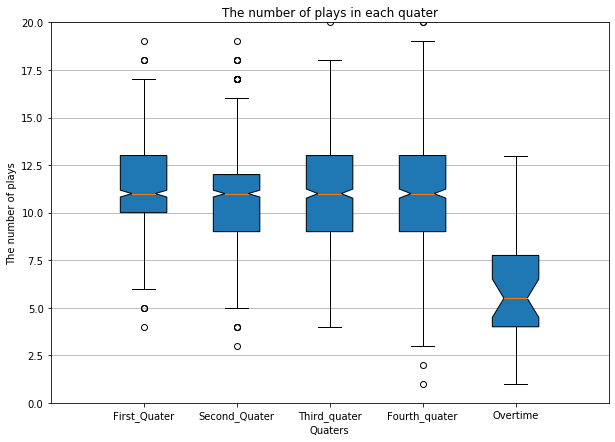

In [42]:
#boxplot of number of plays in each quaters  

fig, ax = plt.subplots(1, figsize=(10, 7)) 

y = [df_PlayNum.First_Quater, df_PlayNum.Second_Quater, df_PlayNum.Third_quater, df_PlayNum.Fourth_quater, df_PlayNum.Overtime.dropna()]
bp = ax.boxplot(y, notch=True, 
                labels=['First_Quater', 'Second_Quater', 'Third_quater', 'Fourth_quater', 'Overtime'],
                vert=True, patch_artist=True)

ax.set_title('The number of plays in each quater')
ax.set_xlabel('Quaters')
ax.set_ylabel('The number of plays')
ax.yaxis.grid(True)

#Zoom up  
x1, x2, y1, y2 = 0, 6, 0, 20

ax.set_xlim(x1, x2)
ax.set_ylim(y1, y2)

plt.show()

In [26]:
#Create a data frame with the covered yards in different quaters on each game

df_Yards = df_game.groupby(['GameId', 'Quarter'])['Yards'].mean()
df_Yards = pd.DataFrame(df_Yards).reset_index().pivot(index='GameId', columns='Quarter', values='Yards')
df_Yards.columns = ['First_Quater', 'Second_Quater', 'Third_quater', 'Fourth_quater', 'Overtime']
df_Yards.head()

,First_Quater,Second_Quater,Third_quater,Fourth_quater,Overtime
GameId,,,,,
2017090700,4.933333,4.571429,2.923077,11.300000,NaN
2017091000,3.666667,7.000000,2.200000,3.733333,NaN
2017091001,4.800000,6.769231,3.000000,-0.500000,NaN
2017091002,3.454545,5.529412,4.000000,1.647059,NaN
2017091003,1.636364,1.777778,3.571429,3.666667,NaN


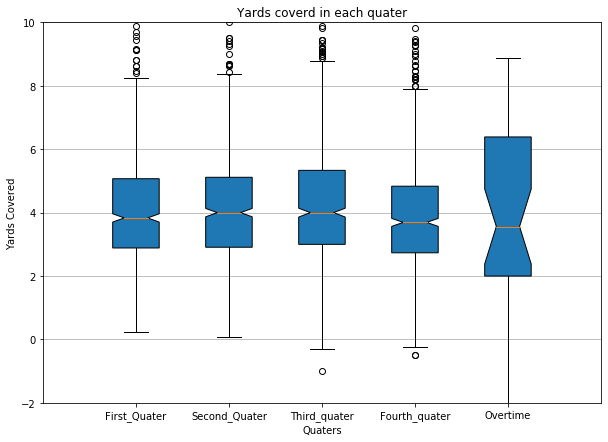

In [47]:
#boxplot of covered yards in each quaters  

fig, ax = plt.subplots(1, figsize=(10, 7)) 

y = [df_Yards.First_Quater, df_Yards.Second_Quater, df_Yards.Third_quater, df_Yards.Fourth_quater, df_Yards.Overtime.dropna()]
bp = ax.boxplot(y, notch=True, 
                labels=['First_Quater', 'Second_Quater', 'Third_quater', 'Fourth_quater', 'Overtime'],
                vert=True, patch_artist=True)

ax.set_title('Yards coverd in each quater')
ax.set_xlabel('Quaters')
ax.set_ylabel('Yards Covered')
ax.yaxis.grid(True)

#Zoom up  
x1, x2, y1, y2 = 0, 6, -2, 10

ax.set_xlim(x1, x2)
ax.set_ylim(y1, y2)

plt.show()

In [59]:
Quater_intens = pd.DataFrame({'Quater':['First_Quater', 'Second_Quater', 'Third_quater', 'Fourth_quater', 'Overtime'],
                              'Average_plays': list(df_PlayNum.mean().values), 
                              'Average_Yards': list(df_Yards.mean().values)})

#Create a colum of the normalised difference from the mean for number of plays in each quater
Quater_intens['NDFM_Plays'] = (Quater_intens.Average_plays - Quater_intens.Average_plays.mean()) / Quater_intens.Average_plays.mean()

#Create a colum of the normalised difference from the mean for covered yards in each quater
Quater_intens['NDFM_Yards'] = (Quater_intens.Average_Yards - Quater_intens.Average_Yards.mean()) / Quater_intens.Average_Yards.mean()

Quater_intens

,Quater,Average_plays,Average_Yards,NDFM_Plays,NDFM_Yards
0,First_Quater,11.543605,4.134189,0.141212,-0.037782
1,Second_Quater,10.815407,4.246785,0.069221,-0.011576
2,Third_quater,11.116279,4.331426,0.098966,0.008124
3,Fourth_quater,11.306686,3.931518,0.117790,-0.084953
4,Overtime,5.794118,4.838690,-0.427188,0.126188


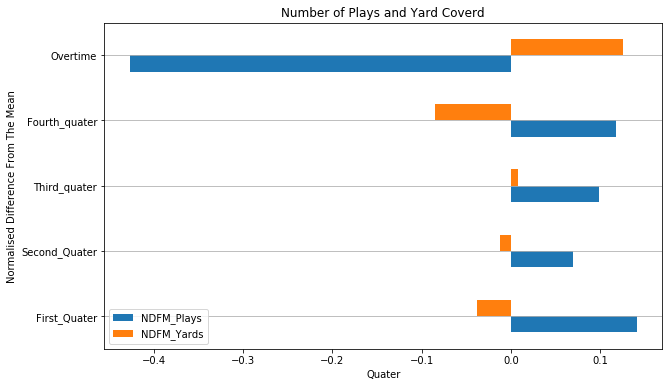

In [64]:
fig, ax = plt.subplots(1, figsize=(10, 6))

Quater_intens.plot(x='Quater', y=['NDFM_Plays', 'NDFM_Yards'], ax=ax, kind='barh') 

ax.set_title('Number of Plays and Yard Coverd')
ax.set_xlabel('Quater')
ax.set_ylabel('Normalised Difference From The Mean')
ax.yaxis.grid(True)

plt.show()

